<a href="https://colab.research.google.com/github/mavrick0/DEEP-LEARNING-EXPRIMENTS/blob/main/DL0605.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 943ms/step - accuracy: 0.3889 - loss: 0.6946 - val_accuracy: 0.0000e+00 - val_loss: 0.7276
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.7778 - loss: 0.6870 - val_accuracy: 0.0000e+00 - val_loss: 0.7782
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - accuracy: 0.7778 - loss: 0.6454 - val_accuracy: 0.0000e+00 - val_loss: 0.7845
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.7778 - loss: 0.6378 - val_accuracy: 0.0000e+00 - val_loss: 0.7768
Epoch 5/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - accuracy: 0.7778 - loss: 0.6403 - val_accuracy: 0.0000e+00 - val_loss: 0.7659
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5000 - loss: 0.6962
Test accuracy: 0.5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step
positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
positive


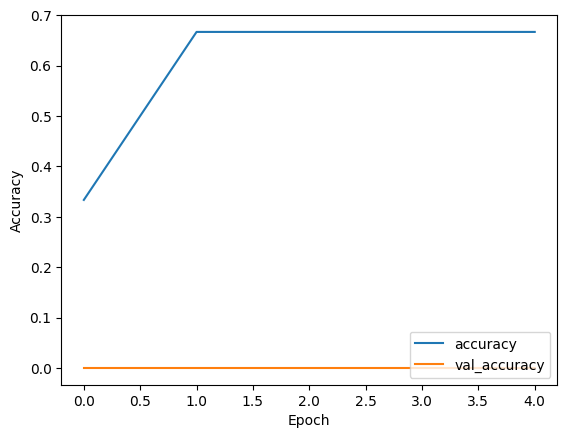

In [1]:
# Install required libraries
# pip install tensorflow numpy pandas scikit-learn

import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Sample dataset
data = {
    'text': ['I love this movie', 'I hate this movie', 'It was fantastic', 'I will never watch this again', 'Great film!', 'Terrible movie'],
    'label': ['positive', 'negative', 'positive', 'negative', 'positive', 'negative']
}
df = pd.DataFrame(data)

# Tokenize and pad the text
max_words = 10000
max_len = 50
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['text'])
sequences = tokenizer.texts_to_sequences(df['text'])
X = pad_sequences(sequences, maxlen=max_len)

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['label'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the model
model = Sequential()
# Embedding layer
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
# LSTM layer
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(64))
# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=2, validation_split=0.1)

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

# Predict sentiment
def predict_sentiment(text):
    sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen=max_len)
    prediction = model.predict(padded_sequence)
    sentiment = 'positive' if prediction >= 0.5 else 'negative'
    return sentiment

# Test prediction
print(predict_sentiment('I really enjoyed this movie'))
print(predict_sentiment('This movie was awful'))

# Plot accuracy graph
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()
